<a href="https://colab.research.google.com/github/revy1817/Data_Science-Numpy-Matplotlib-Scikit-learn-/blob/less4/Less4_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание №1:**


---

Примените модель понижения размерности к вашим данным, визуализируйте их.

In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [47]:
DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/less2/train.csv'
df = pd.read_csv(DATASET_PATH, sep=',')

X = pd.DataFrame(df).drop('Price', axis=1)

X

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B


In [48]:
y = pd.DataFrame(df, columns=["Price"]).astype(int)
y

,Price
0,305018
1,177734
2,282078
3,168106
4,343995
...,...
9995,119367
9996,199715
9997,165953
9998,171842


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [50]:
median_ls = X['LifeSquare'].median()
X['LifeSquare'].fillna(median_ls, inplace=True)

mode_hc = X['Healthcare_1'].mode()[0]
X['Healthcare_1'].fillna(mode_hc, inplace=True)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [51]:
score_map = {
    'A': 1,
    'B': 2
}

X['Ecology_2'] = X['Ecology_2'].map(score_map)
X['Ecology_3'] = X['Ecology_3'].map(score_map)
X['Shops_2'] = X['Shops_2'].map(score_map)
X

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,2,2,11,3097,0,540.0,0,0,2
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,2,2,30,6207,1,1183.0,1,0,2
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,2,2,33,5261,0,240.0,3,1,2
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,2,2,1,264,0,540.0,0,1,2
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,2,2,33,8667,2,540.0,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,2,2,52,10311,6,540.0,1,9,2
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,2,2,2,629,1,540.0,0,0,1
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,2,2,20,4386,14,540.0,1,5,2
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,2,2,47,8004,3,125.0,3,5,2


In [56]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
y_std = scaler.fit_transform(y)


In [54]:
X = pd.DataFrame(X_std, columns=X.columns)

X

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,0.705032,-0.536895,1.321667,2.788129,-0.045490,0.130489,-0.863728,-0.385115,-0.009857,-0.364931,0.09897,0.16816,-0.780698,-0.562861,-0.337347,-0.394061,-0.883480,-0.880402,0.299864
1,-1.105301,-0.651613,-1.060788,-0.782767,-0.170963,0.060460,-0.291306,-0.680290,-0.010096,-0.002690,0.09897,0.16816,0.303050,0.213359,-0.295384,0.413835,-0.213923,-0.880402,0.299864
2,-0.034661,-1.133425,1.321667,1.046005,0.148891,0.130489,-1.245343,0.647998,-0.009986,-0.783473,0.09897,0.16816,0.474169,-0.022752,-0.337347,-0.770995,1.125190,-0.672333,0.299864
3,-1.241343,-1.133425,-1.060788,-0.755348,-0.045490,-0.184643,0.281117,1.385936,-0.010041,-0.938799,0.09897,0.16816,-1.351093,-1.269944,-0.337347,-0.394061,-0.883480,-0.672333,0.299864
4,1.128390,1.000316,0.130439,0.378451,0.029978,0.095474,1.425961,0.500411,-0.010066,1.377425,0.09897,0.16816,0.474169,0.827346,-0.253421,-0.394061,-0.883480,0.368011,0.299864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.466091,0.243182,0.130439,-0.343107,-0.039075,-0.009569,-1.054535,-0.089940,-0.010021,1.524669,0.09897,0.16816,1.557917,1.237669,-0.085570,-0.394061,-0.213923,0.992218,0.299864
9996,1.622135,-0.536895,0.130439,0.379525,0.010082,0.095474,0.853539,-1.860992,-0.010041,-0.392373,0.09897,0.16816,-1.294053,-1.178844,-0.295384,-0.394061,-0.883480,-0.880402,-3.334848
9997,-1.150168,2.927567,-1.060788,-1.266413,-0.257299,-0.044584,-1.054535,-1.123053,-0.010136,2.870953,0.09897,0.16816,-0.267344,-0.241141,0.250131,-0.394061,-0.213923,0.159943,0.299864
9998,1.271430,-0.674556,-1.060788,-1.139037,-0.181959,-0.044584,-1.054535,-0.532703,-0.010081,0.635458,0.09897,0.16816,1.272720,0.661869,-0.211458,-0.915487,1.125190,0.159943,0.299864


In [57]:
y = pd.DataFrame(y_std, columns=y.columns)
y

,Price
0,0.978593
1,-0.392003
2,0.731575
3,-0.495677
4,1.398298
...,...
9995,-1.020499
9996,-0.155311
9997,-0.518861
9998,-0.455448


In [81]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

X_train_tsne = tsne.fit_transform(X)

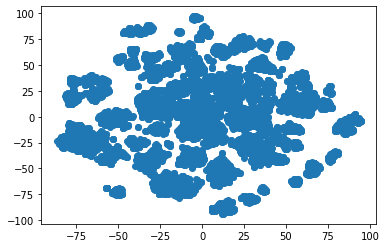

In [82]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()